# Country of export and import by month and year

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import os
import numpy as np
import csv
import seaborn as sns


In [15]:
colors = ['#edd09e', '#1de286', '#5d680a', '#296d0a', '#02ede0', '#ad81d1', '#86afe8',
          '#69e234', '#cae01d', '#e894e3', '#0c633b', '#d6e088', '#e52bda', '#e01a8d',
          '#d18e91', '#63440d', '#560909', '#db8ab9', '#8b8c7e', '#86ceca', '#f2aa2e',
          '#f21515', '#f9acac', '#081156', '#700e12', '#ef1019', '#2075ea', '#390f5b',
          '#8de0b9', '#8823db', '#afe896', '#ba96ab', '#8e0286', '#8e0153']

index = 0
country_colors = {}

def return_color(country):
    global index
    if country in country_colors:
        return country_colors[country]
    country_colors[country] = colors[index]
    index += 1
    return country_colors[country]


### Which countries import everything by month?

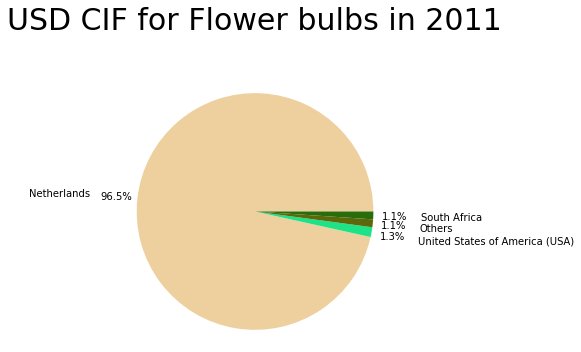

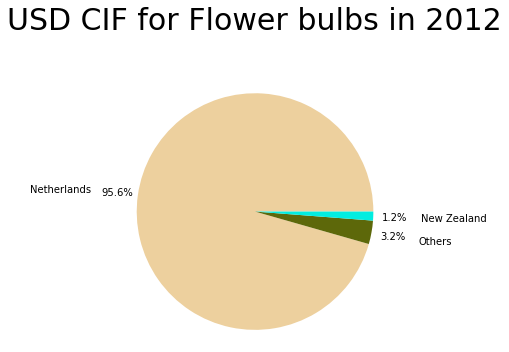

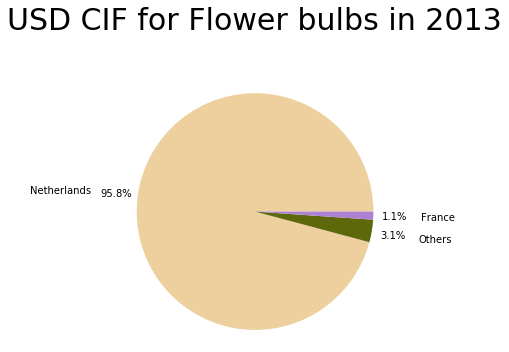

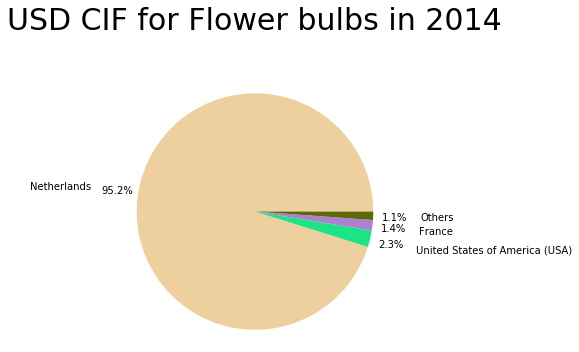

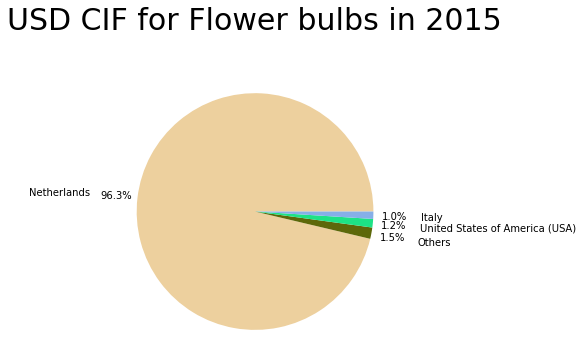

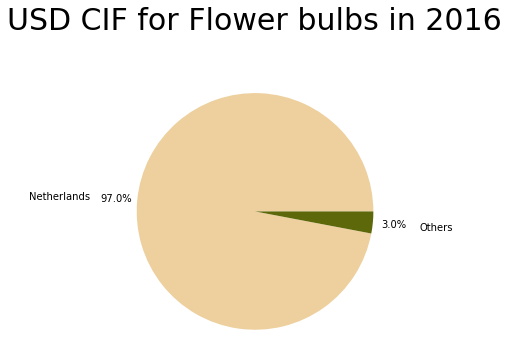

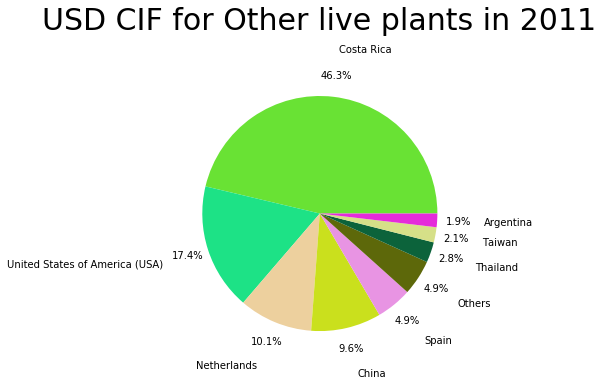

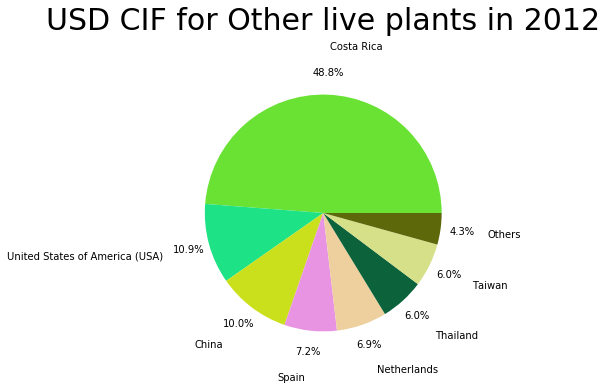

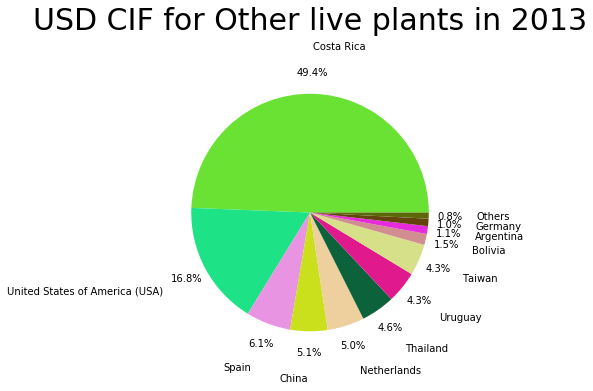

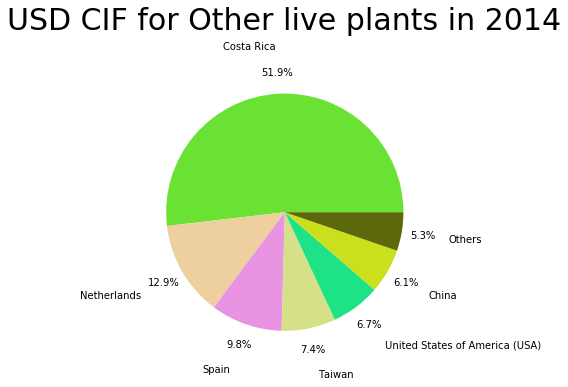

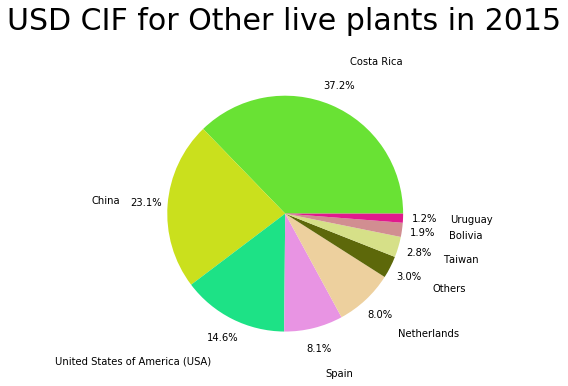

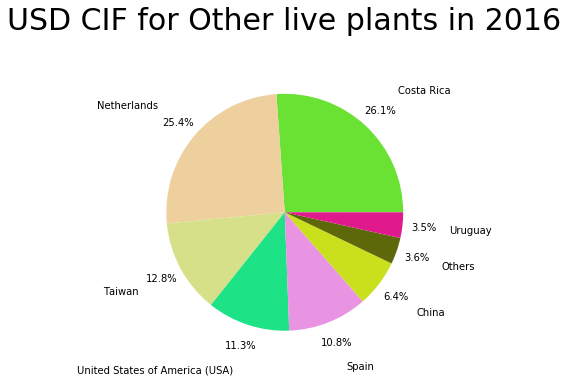

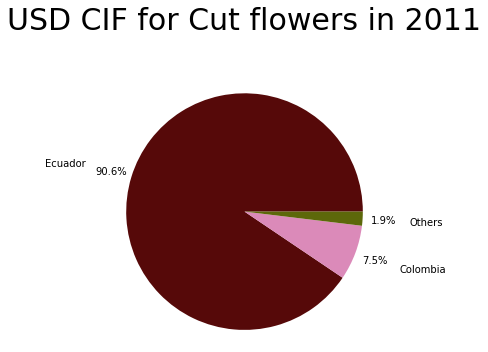

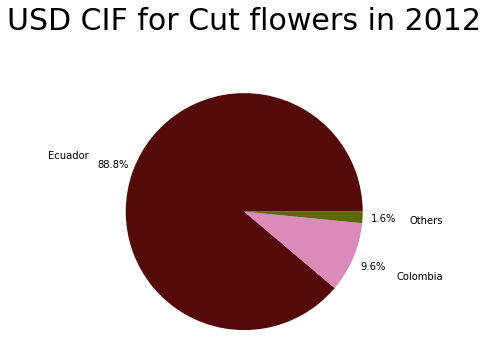

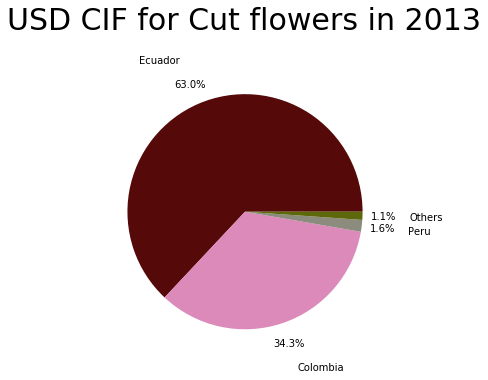

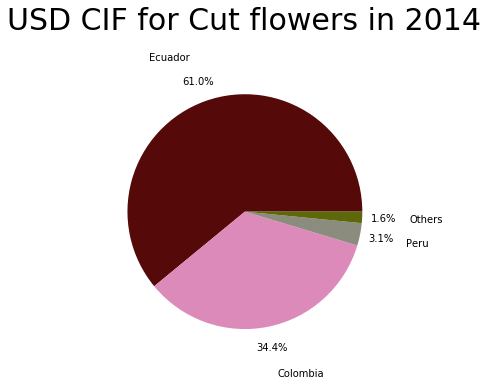

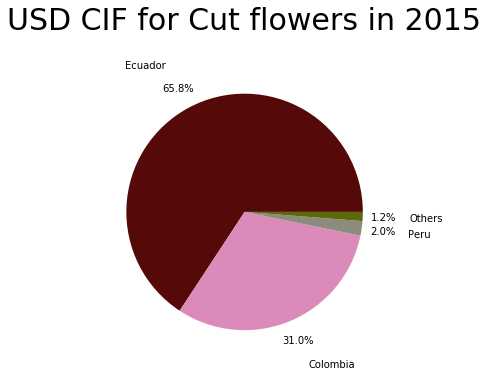

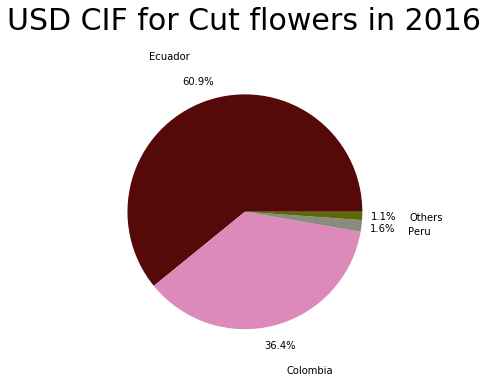

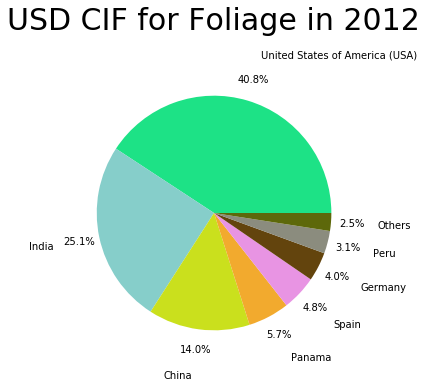

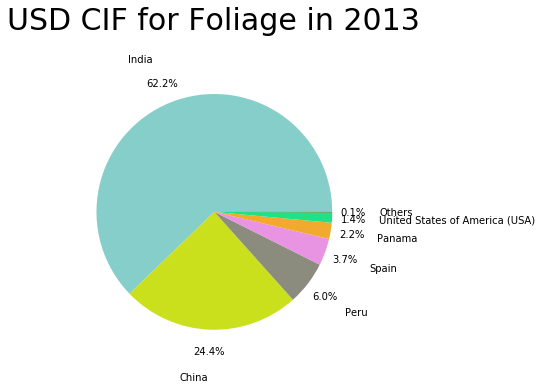

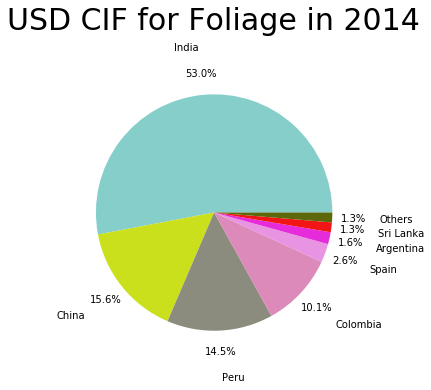

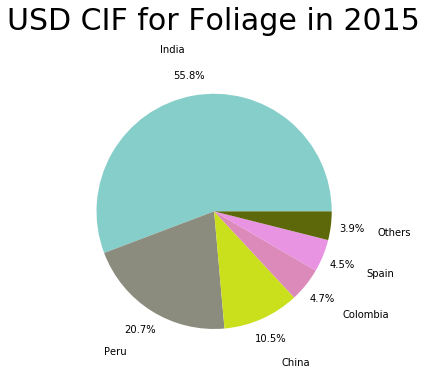

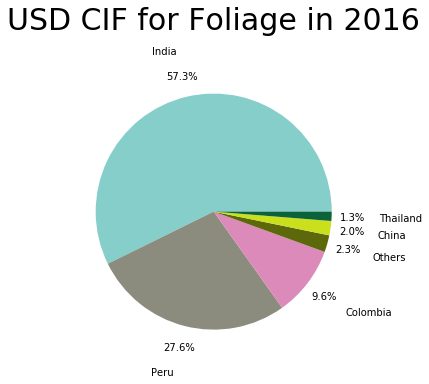

In [17]:
def define_country(row, total):
    if row[1] > 0.01*total:
        return row[0]
    return "Others"

filename = "data" + os.sep + "import" + os.sep + "all_import_with_group_and_label.txt"
usecols =  ["CIF", "PA_ORIG", "YEAR", "GROUP"]

data = pd.read_csv(filename, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols)
 
for group in ["Flower bulbs", "Other live plants", "Cut flowers", "Foliage"]:
    new_data = data[data["GROUP"] == group]
        
    for year in range(2011, 2017):
        temporal_data = new_data[new_data["YEAR"] == year]
        
        if not temporal_data.empty:
            sums = temporal_data.groupby(['PA_ORIG']).sum().reset_index()
            total = sums["CIF"].sum()

            sums['COUNTRY'] = sums.apply(lambda x: define_country(x, total), axis=1)

            aux = sums[["COUNTRY", "CIF"]].groupby("COUNTRY").sum()
            #slices = aux.sort_values()
            
            aux = aux.sort_values("CIF", ascending=False)
            
            
            plt.pie(aux,colors= [return_color(x) for x in aux.index],
                    autopct='%1.1f%%', pctdistance=1.18, labels = aux.index, 
                    labeldistance=1.4)
            

            # View the plot drop above
            plt.axis('equal')

            # View the plot
            plt.tight_layout()
            #plt.legend(aux.index, loc='upper right', bbox_to_anchor=(1.7, 1))
            
            plt.title("USD CIF for {} in {}".format(group, year), fontdict ={'fontsize': 30}, y=1.18)

            plt.savefig("USD CIF for {} in {}".format(group, year), bbox_inches='tight')
            plt.show()

### To which countries we export everything by month?

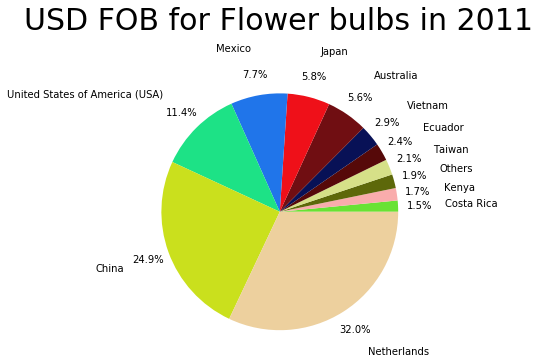

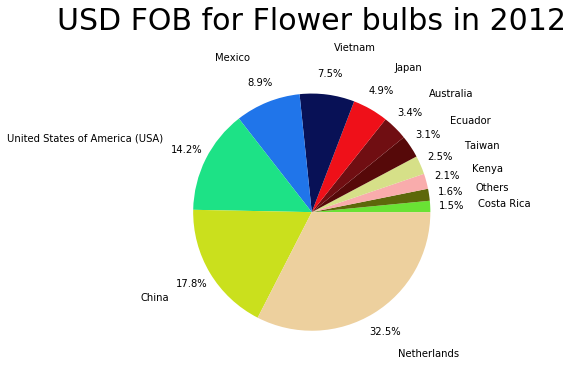

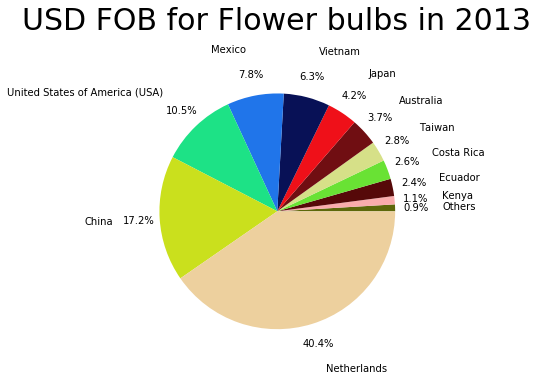

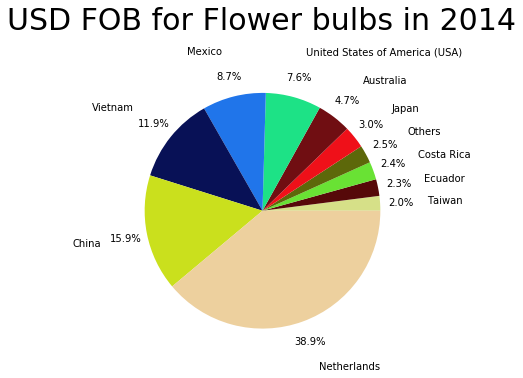

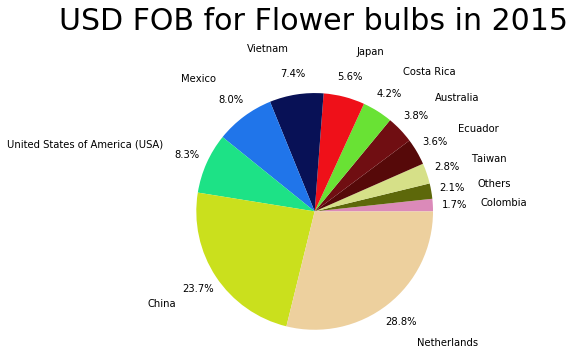

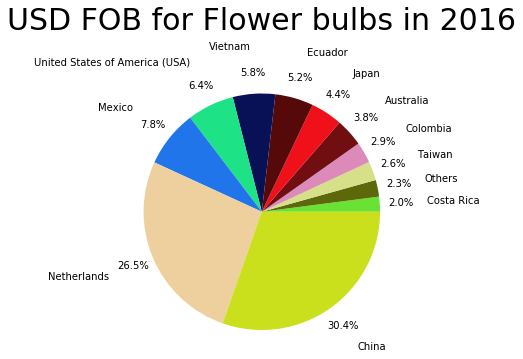

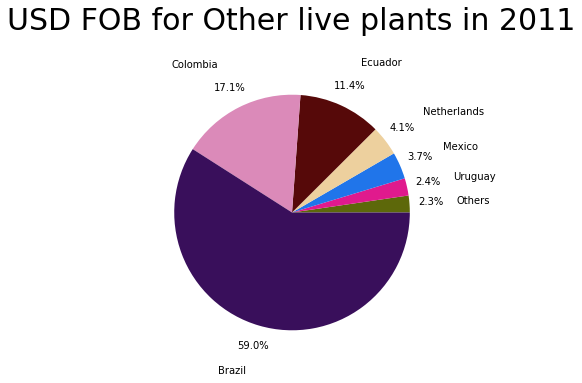

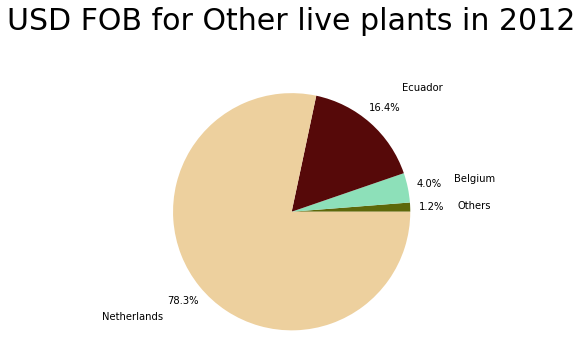

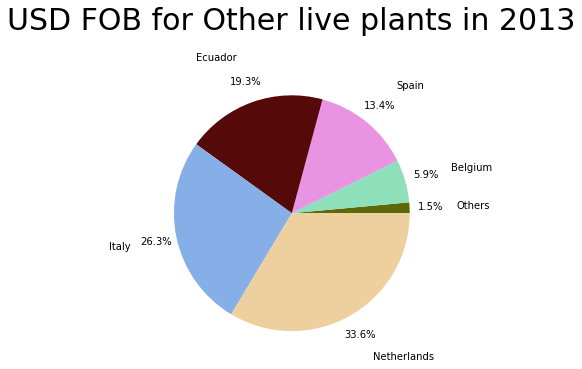

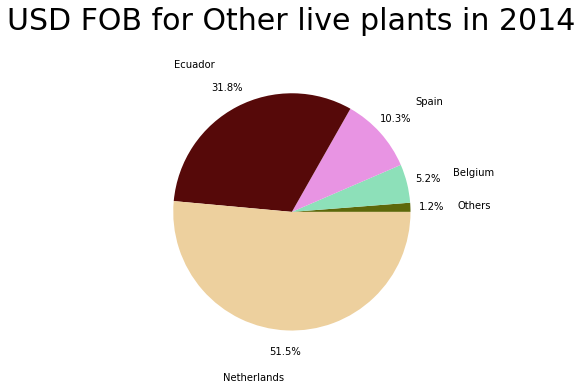

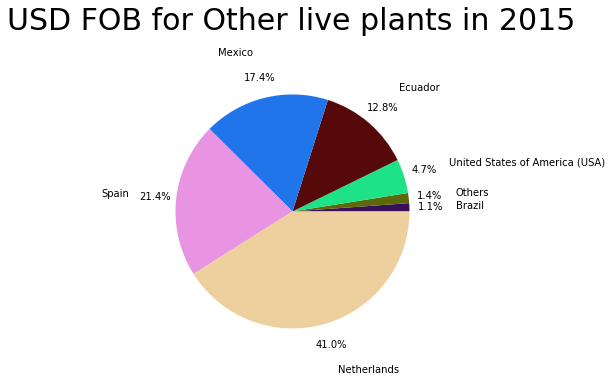

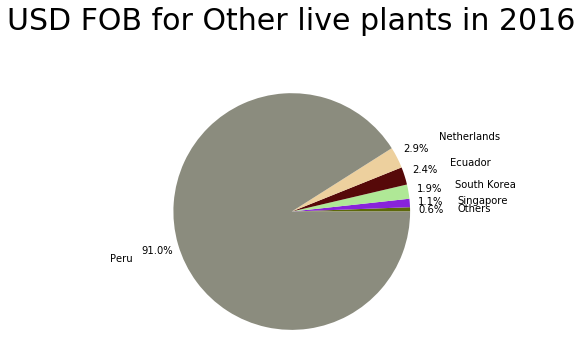

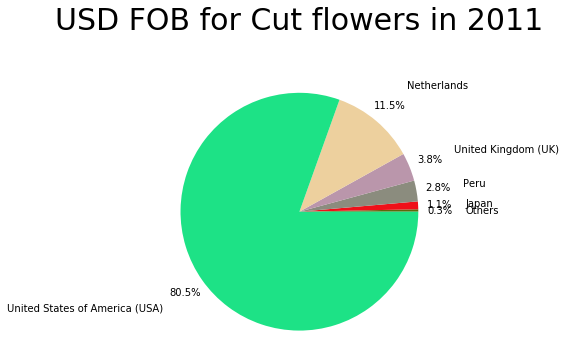

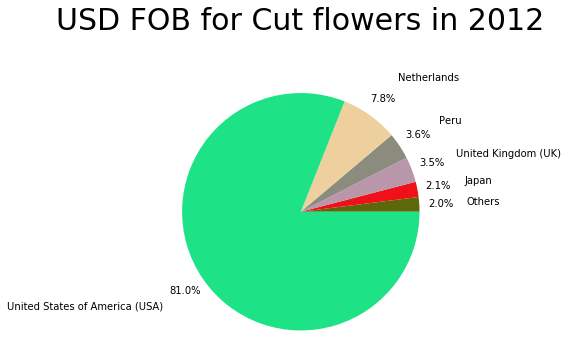

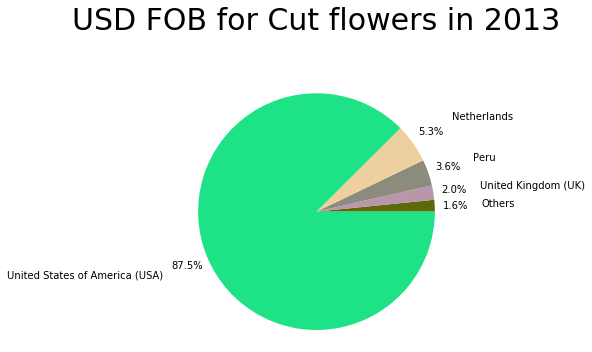

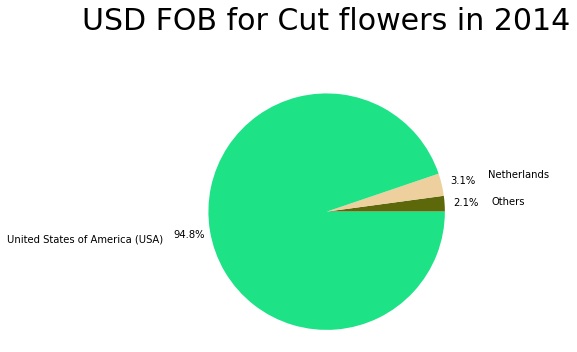

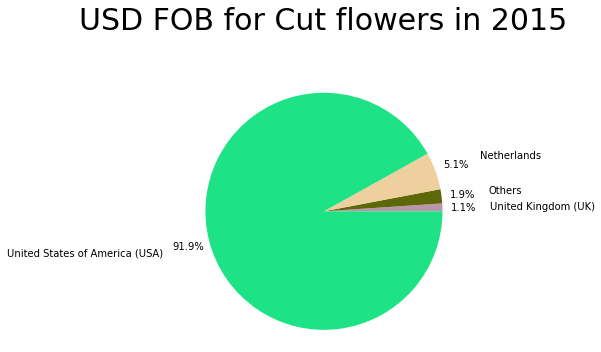

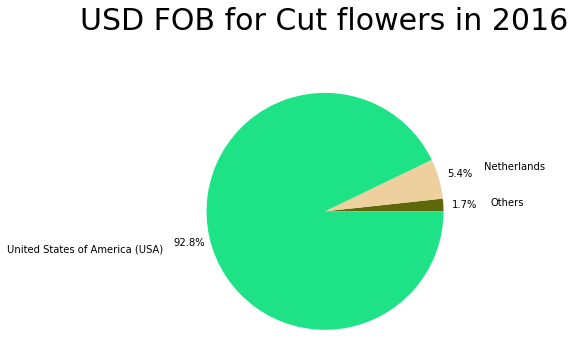

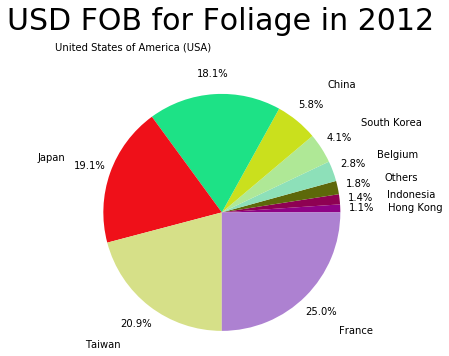

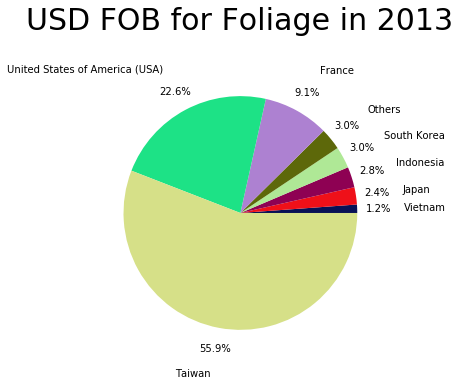

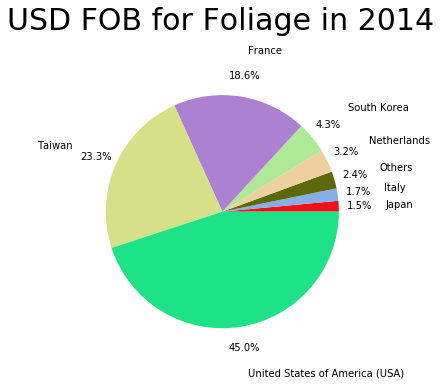

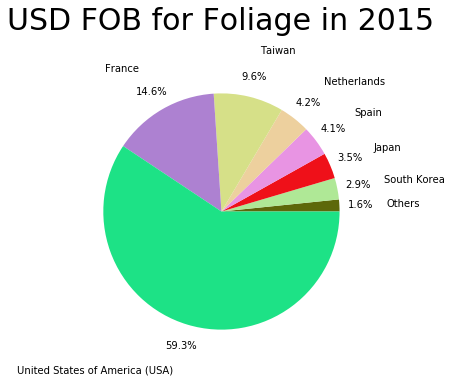

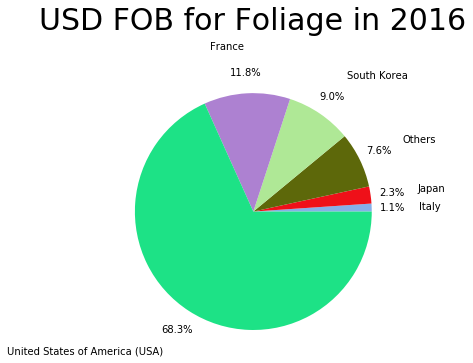

In [18]:
def define_country(row, total):
    if row[1] > 0.01*total:
        return row[0]
    return "Others"

filename = "data" + os.sep + "export" + os.sep + "all_export_with_group_and_label.txt"
usecols =  ["TOTALVALORFOB", "PAISDESTINO", "YEAR", "GROUP"]

data = pd.read_csv(filename, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols)
 
for group in ["Flower bulbs", "Other live plants", "Cut flowers", "Foliage"]:
    new_data = data[data["GROUP"] == group]
        
    for year in range(2011, 2017):
        temporal_data = new_data[new_data["YEAR"] == year]
        
        if not temporal_data.empty:
            sums = temporal_data.groupby(['PAISDESTINO']).sum().reset_index()
            total = sums["TOTALVALORFOB"].sum()

            sums['COUNTRY'] = sums.apply(lambda x: define_country(x, total), axis=1)

            aux = sums[["COUNTRY", "TOTALVALORFOB"]].groupby("COUNTRY").sum().sort_values("TOTALVALORFOB")

            plt.pie(aux,colors= [return_color(x) for x in aux.index],
                    autopct='%1.1f%%', pctdistance=1.18, labels = aux.index, 
                    labeldistance=1.4)

            # View the plot drop above
            plt.axis('equal')

            # View the plot
            plt.tight_layout()
            #plt.legend(aux.index, loc='upper right', bbox_to_anchor=(1.3, 1))
            
            plt.title("USD FOB for {} in {}".format(group, year), fontdict ={'fontsize': 30}, y=1.18)

            plt.savefig("USD FOB for {} in {}".format(group, year), bbox_inches='tight')
            plt.show()